Precisión del modelo de k-NN: 0.8


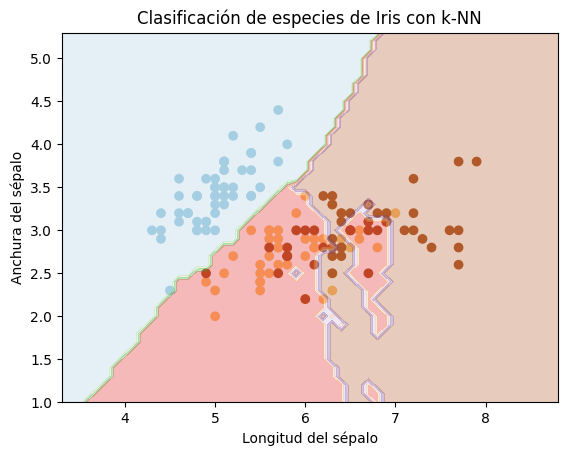

In [26]:
#-----------------------------------------------------------------------------
#   ALGORITMO POR INSTANCIAS KNN DE CLASIFICACIÓN
#-----------------------------------------------------------------------------
#-----------------------------------------------------------------------------
#   INSTALAMOS LIBRERÍAS
#-----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------------
#   CARGAMOS LOS DATOS IRIS
#-----------------------------------------------------------------------------
from sklearn.datasets import load_iris
iris = load_iris()

#-----------------------------------------------------------------------------
#   ELEGIMOS LOS DATOS NECESARIOS
#-----------------------------------------------------------------------------
X = iris.data[:, :2]  # Sólo tomamos las primeras dos características para una fácil visualización
y = iris.target

#-----------------------------------------------------------------------------
#   DIVIDIMOS LOS DATOS EN ENTRENAMIENTO Y PRUEBA
#-----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42 )

#-----------------------------------------------------------------------------
#   CREACIÓN DEL MODELO DE KNN DE CLASIFICACIÓN
#-----------------------------------------------------------------------------
#     n_neighbors     número de vecinos: (5)
#     weights         función de peso de predicción: (uniform), distance
#     algorithm       algoritmo de cálculo: ball_tree, kd_tree, brute, (auto)
#     leaf_size       tamaño de la hoja (30)
#     p               parámetro de potencia de la métrica de Minkowski
#     metric          métrica de cálculo de la distancia: (Minkowski), precomputed
#     metric_params   argumentos adicionales de la función de métrica: (none)
#     n_jobs          número de trabajos en paralelo que se ejecutarán al buscar vecinos: (none)
#-----------------------------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier( n_neighbors = 10,
                                  leaf_size = 10 )  # Usando k=5

#-----------------------------------------------------------------------------
#   ENTRENAMIENTO DEL MODELO
#-----------------------------------------------------------------------------
knn_model.fit( X_train, y_train )

#-----------------------------------------------------------------------------
#   PREDICCIONES DEL MODELO
#-----------------------------------------------------------------------------
y_pred = knn_model.predict( X_test )

#-----------------------------------------------------------------------------
#   CÁLCULO DEL ERROR CUADRÁTIVO MEDIO (MSE) DEL MODELO
#-----------------------------------------------------------------------------
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred )
print( "Precisión del modelo de k-NN:", accuracy )

#-----------------------------------------------------------------------------
#   CREACIÓN DE LA MALLA PARA PLOTEAR LA SUPERFICIE DE DECISIÓN
#-----------------------------------------------------------------------------
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid( np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

#-----------------------------------------------------------------------------
#   PREDICCIÓN DE LA CLASE PARA CADA PUNTO EN LA MALLA
#-----------------------------------------------------------------------------
Z = knn_model.predict( np.c_[xx.ravel(), yy.ravel()] )
Z = Z.reshape( xx.shape )

#-----------------------------------------------------------------------------
#   DIBUJO DEL MODELO
#-----------------------------------------------------------------------------
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired) # Puntos de datos
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired) # Superficie de decisión

plt.xlabel( 'Longitud del sépalo' )
plt.ylabel( 'Anchura del sépalo' )
plt.title( 'Clasificación de especies de Iris con k-NN' )

plt.show()

Error cuadrático medio (MSE) del modelo de k-NN para regresión: 0.07811999999999998


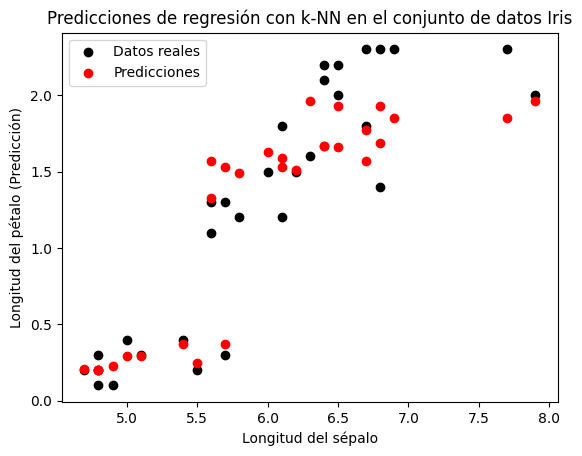

In [27]:
#-----------------------------------------------------------------------------
#   ALGORITMO POR INSTANCIAS KNN DE REGRESIÓN
#-----------------------------------------------------------------------------
#-----------------------------------------------------------------------------
#   INSTALAMOS LIBRERÍAS
#-----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#-----------------------------------------------------------------------------
#   CARGAMOS LOS DATOS IRIS
#-----------------------------------------------------------------------------
iris = load_iris()

#-----------------------------------------------------------------------------
#   ELEGIMOS LOS DATOS NECESARIOS
#-----------------------------------------------------------------------------
X = iris.data[:, :2]  # Tomamos solo las primeras dos características para simplificar
y = iris.data[:, 3]   # Usamos la longitud del pétalo como la variable dependiente para la regresión

#-----------------------------------------------------------------------------
#   DIVIDIMOS LOS DATOS EN ENTRENAMIENTO Y PRUEBA
#-----------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42 )

#-----------------------------------------------------------------------------
#   CREACIÓN DEL MODELO DE KNN DE REGRESIÓN
#-----------------------------------------------------------------------------
#     n_neighbors     número de vecinos: (5)
#     weights         función de peso de predicción: (uniform), distance
#     algorithm       algoritmo de cálculo: ball_tree, kd_tree, brute, (auto)
#     leaf_size       tamaño de la hoja (30)
#     p               parámetro de potencia de la métrica de Minkowski
#     metric          métrica de cálculo de la distancia: (Minkowski), precomputed
#     metric_params   argumentos adicionales de la función de métrica: (none)
#     n_jobs          número de trabajos en paralelo que se ejecutarán al buscar vecinos: (none)
#-----------------------------------------------------------------------------
knn_regressor = KNeighborsRegressor( n_neighbors = 10,
                                     leaf_size = 10 )  # Usando k=5

#-----------------------------------------------------------------------------
#   ENTRENAMIENTO DEL MODELO
#-----------------------------------------------------------------------------
knn_regressor.fit( X_train, y_train )

#-----------------------------------------------------------------------------
#   PREDICCIONES DEL MODELO
#-----------------------------------------------------------------------------
y_pred = knn_regressor.predict( X_test )

#-----------------------------------------------------------------------------
#   CÁLCULO DEL ERROR CUADRÁTIVO MEDIO (MSE) DEL MODELO
#-----------------------------------------------------------------------------
mse = mean_squared_error( y_test, y_pred )
print("Error cuadrático medio (MSE) del modelo de k-NN para regresión:", mse)

#-----------------------------------------------------------------------------
#   DIBUJO DEL MODELO
#-----------------------------------------------------------------------------
plt.scatter( X_test[:, 0], y_test, color = 'black', label = 'Datos reales' )
plt.scatter( X_test[:, 0], y_pred, color = 'red', label = 'Predicciones' )
plt.xlabel( 'Longitud del sépalo' )
plt.ylabel( 'Longitud del pétalo (Predicción)' )
plt.title( 'Predicciones de regresión con k-NN en el conjunto de datos Iris' )
plt.legend()
plt.show()